<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [101]:
# !pip install ydata_profiling

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport


random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [286]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [287]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [288]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [289]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [290]:
# полные дубли
df_train.duplicated().sum(), df_test.duplicated().sum()

(np.int64(985), np.int64(62))

In [291]:
feat_cols = [col for col in df_train.columns if col != 'selling_price']

df_train[feat_cols].duplicated().sum(), df_test[feat_cols].duplicated().sum()

(np.int64(1159), np.int64(69))

In [292]:
list(df_train.columns[df_test.isna().any()])

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [293]:
profile = ProfileReport(df_train, title="EDA Cars data")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 291.82it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Ответ:**
- Пропуски есть в колонках: engine, max_power, mileage, seats, torque (в тесте новых колонок с пропусками не появляется)
- В трейне есть 985 дубликатов, в тесте 62
- Если смотреть по фичам, исключая ценник, то дубликатов 1159 в трейне, 69 в тесте
- Библиотека для анализа подсказывает ещё несколько инсайдов:
    - km_driven is highly overall correlated with year	High correlation
    - selling_price is highly overall correlated with transmission and 1 other fields	High correlation
    - transmission is highly overall correlated with selling_price	High correlation
    - year is highly overall correlated with km_driven and 1 other fields
    - seller_type is highly imbalanced (51.8%)
- Таргет (цена) имеет длинный хвост справа
- Часть фичей анализируется криво из-за того, что по смыслу они числа, а записаны в строке с указанием размерности

Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [294]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [295]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [296]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [297]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

**Ответ:** 
- Статистики по числовым/категориальным фичам бьються на трейне и тесте (похожи), грубо можно сказать, что распределения похожие, значит все ок и модельку можно строить на трейне и оценивать на тесте
- Средние и медианы похожи на трейне и тесте. Медиана устойчива к выбросам, разница в ней может означать сдвиг распределения фичи в тесте относительно трейна (ну или изменение распределения в целом), а среднее сильно реагирует на выборсы (в силу того как считается), поэтому разница в нем может быть обусловлена просто наличием небольшого кол-ва сильных выбросов в одной из выборок
- В тесте не возрастает кол-во категорий в соотв. признаках, можно предположить, что там не будет новых категорий и все ок (может быть такое, что кол-во то же, но категории в признаке разные, но это можем посмотреть предметно далее)
- Опять видим проблемы в некоторых признаках - они являются числовыми, но записаны в строках с единицами измерения (а в torque у нас и крутящий момент, и обороты)

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [298]:
target = "selling_price"
feat_cols = [col for col in df_train.columns if col != target]

X_train = df_train[feat_cols]
y_train = df_train[target]

X_train.duplicated().sum()

np.int64(1159)

In [299]:
# все строки-дубли
X_train[X_train.duplicated(keep=False)]

name  year  km_driven    fuel  \
22                     Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                 Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27             Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
28                          Fiat Palio 1.2 ELX  2003      50000  Petrol   
29                   Maruti Omni 8 Seater BSIV  2012      35000  Petrol   
...                                        ...   ...        ...     ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
22    Individual       Manual   First Owner   21.4 kmpl  1197 CC   83.1 bhp   
26    Individual       Manual   First Owner   16.8 kmpl   796 CC   34.2 bhp   
27    Individual       Manual   First Owner   24.3 kmpl  1248 CC   88.5 bhp   
28    Individual       Manual  Second Owner         NaN      NaN        NaN   
29    Individual       Manual  Second Owner   14.0 kmpl   796 CC     35 bhp   
...          ...          ...           ...         ...      ...        ...   
6981  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC     74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   

                   torque  seats  
22         115Nm@ 4000rpm    5.0  
26          59Nm@ 2500rpm    8.0  
27         200Nm@ 1750rpm    5.0  
28                    NaN    NaN  
29        6.1kgm@ 3000rpm    5.0  
...                   ...    ...  
6981  215Nm@ 1750-3000rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 12 columns]

In [300]:
# а почему это строку написали за меня?)
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')
df_train = df_train.reset_index(drop=True)

In [301]:
assert df_train.shape == (5840, 13)

**Ответ:**
- 1159 дублей по фичам
- да, могут быть, можно кластеризовать объекты попробовать и если будет кластер, в котором все очень-близко, то их можно считать дублями (ну или просто all_close какой-то по фичам сделать). Такие дубли могут быть из-за того, что, например, километраж отличается на чуть-чуть т.к. владелец объявление продублировал через неделю то же самое и чуть набежало, или ошибся при наборе и т.п

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [302]:
df_train["torque"].sample(20, random_state=42)

4582    220Nm at 1400-2600 rpm
177              77Nm@ 3500rpm
167        115Nm@ 3500-3600rpm
3722       215Nm@ 1750-2500rpm
2339            113Nm@ 4500rpm
1047       402Nm@ 1600-3000rpm
4676       230Nm@ 1500-2500rpm
3955      5.7@ 2,500(kgm@ rpm)
2534            171Nm@ 1800rpm
1501           74.5Nm@ 4000rpm
1514     219.7Nm@ 1750-2750rpm
1383     259.9Nm@ 1900-2750rpm
2664             57Nm@ 2500rpm
1760                       NaN
3611                       NaN
1268       290Nm@ 1800-2800rpm
5342       250Nm@ 1500-2500rpm
2225       16@ 2,000(kgm@ rpm)
4641            136Nm@ 4250rpm
2314         146Nm at 4800 rpm
Name: torque, dtype: object

In [303]:
import re
# регулярки писал с помощью deepseek) 
# для крутящего момента (и оборотов) надо учесть несколько кейсов, это видно в принте выше
# после крутящего момента указан диапазон или конкретное значение оборотов, при ктором этот максимальный момент достигается (будем брать среднее, если диапазон)
# логично будет диапазон заменить на среднее кол-во оборотов
# встречается kgm, такие значения надо перевести Nm для согласованности единиц измерения

def extract_torque(torque_str):
    """
    Обработка torque
    """
    if pd.isna(torque_str):
        return np.nan, np.nan
    
    torque_str = str(torque_str).strip().lower()
    torque_value, rpm_value = np.nan, np.nan
    
    # kgm или kg.m (килограмм-метры)
    # ищем циферки/циферкци с точками и единицы измерения, указанные выше
    kgm_match = re.search(r'(\d+\.?\d*)\s*(?:kg\.?m|kgm|kg)', torque_str)
    if kgm_match:
        torque_kgm = float(kgm_match.group(1))
        torque_value = torque_kgm * 9.80665
    
    # ищем то же, что и раньше, то в ньютон-метрах
    nm_match = re.search(r'(\d+\.?\d*)\s*(?:nm|n\.m)', torque_str)
    if nm_match and pd.isna(torque_value):  # Если еще не нашли в kgm
        torque_value = float(nm_match.group(1))
    
    # ищем диапазон  (например, 1800-3000rpm)
    range_match = re.search(r'@?\s*(\d+)[\s\-–]+(\d+)\s*(?:rpm)?', torque_str)
    if range_match:
        rpm1 = float(range_match.group(1))
        rpm2 = float(range_match.group(2))
        rpm_value = (rpm1 + rpm2) / 2
    
    # Одно значение типа @ 3000rpm
    elif re.search(r'@', torque_str):
        single_match = re.search(r'@\s*(\d+\.?\d*)\s*(?:rpm)?', torque_str)
        if single_match:
            rpm_value = float(single_match.group(1))

    return torque_value, rpm_value

def preprocess_problem_feats(df):
    df = df.copy()
    
    # оставляем числа онли
    df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
    df['engine'] = df['engine'].str.extract(r'(\d+)').astype(float)
    df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
    df[["torque", "max_torque_rpm"]] = df["torque"].apply(extract_torque).apply(pd.Series)

    return df

In [304]:
# вроде неплохо, наверное если сильно захотеть, то можно перебрать все кейсы написания,
# но при инференсе могут появляться новые (в том числе опечатки), остановимся на таком результате...
df_train["torque"].sample(20, random_state=42).apply(extract_torque)

4582    (220.0, 2000.0)
177      (77.0, 3500.0)
167     (115.0, 3550.0)
3722    (215.0, 2125.0)
2339    (113.0, 4500.0)
1047    (402.0, 2300.0)
4676    (230.0, 2000.0)
3955         (nan, 2.0)
2534    (171.0, 1800.0)
1501     (74.5, 4000.0)
1514    (219.7, 2250.0)
1383    (259.9, 2325.0)
2664     (57.0, 2500.0)
1760         (nan, nan)
3611         (nan, nan)
1268    (290.0, 2300.0)
5342    (250.0, 2000.0)
2225         (nan, 2.0)
4641    (136.0, 4250.0)
2314       (146.0, nan)
Name: torque, dtype: object

In [305]:
df_train = preprocess_problem_feats(df_train)
df_test = preprocess_problem_feats(df_test)

In [306]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

      torque  seats  max_torque_rpm  
0  190.00000    5.0          2000.0  
1  250.00000    5.0          2000.0  
2  219.66896    5.0          2250.0  
3        NaN    5.0             4.0  
4  113.75000    5.0          4000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [307]:
# считаем медиану на трейне, применяем на всех данных
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col in df_train.columns:
        train_median = df_train[col].median()
        df_train[col].fillna(train_median, inplace=True)
        df_test[col].fillna(train_median, inplace=True)

/tmp/ipykernel_25968/932197159.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(train_median, inplace=True)
/tmp/ipykernel_25968/932197159.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [308]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(np.int64(0), np.int64(0))

**Ответ:**
- Медиана устойчива к выбросам, ей заполнять лучше, т.к. получается более стабильная фича (среднее улетает в сторону выбросов)
- на трейне считаем, заполняем этой статистикой в трейне и тесте, иначе это лик данных. Тест - те данные, что модель не видела. Ну или можно провести аналогию с инференсом, у нас тест то, на чем модель применяется, на этапе инференса нас уже должны быть посчитаны статистики, которыми мы заполняем.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [309]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

**Ответ:** это дискретная величина, а не непрерывная, ну и по-хорошему нельзя сказать что вот между 3мя и 4мя местами такая же разница как между 4мя и 5ью, ну и на цену это влияет нелинейно (например, 2 места может быть в кабриолете за много денег, а 4 места в обычном авто эконом класса)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [310]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   171.209250     5.426712     2707.399401  
std      31.640418    82.643764     0.982344     1079.791746  
min       0.000000    47.071920     2.000000        1.000000  
25%      68.000000   112.000000     5.000000     2000.000000  
50%      81.860000   160.000000     5.000000     2375.000000  
75%      99.000000   200.000000     5.000000     3500.000000  
max     400.000000   789.000000    14.000000     5000.000000

In [311]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   174.858914     5.403000     2780.684000  
std      34.893389    87.916553     0.912921     1059.626648  
min      34.200000    48.000000     4.000000        1.000000  
25%      69.000000   111.795810     5.000000     2000.000000  
50%      82.425000   160.000000     5.000000     2375.000000  
75%     102.000000   205.000000     5.000000     3800.000000  
max     280.000000   620.000000     9.000000     5000.000000

In [312]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [313]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

**Ответ:** ну т.к. мы до этого смотрели дискрайб по числовым перед нашей обработкой, то не все можем проанализировать нормально, но видно, что для km_driven сдвинулось среднее. В теории могло изменить распредлеения если они сильно скошены и сильно много пропусков. В нашем случае эффект небольшой и не критичный

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

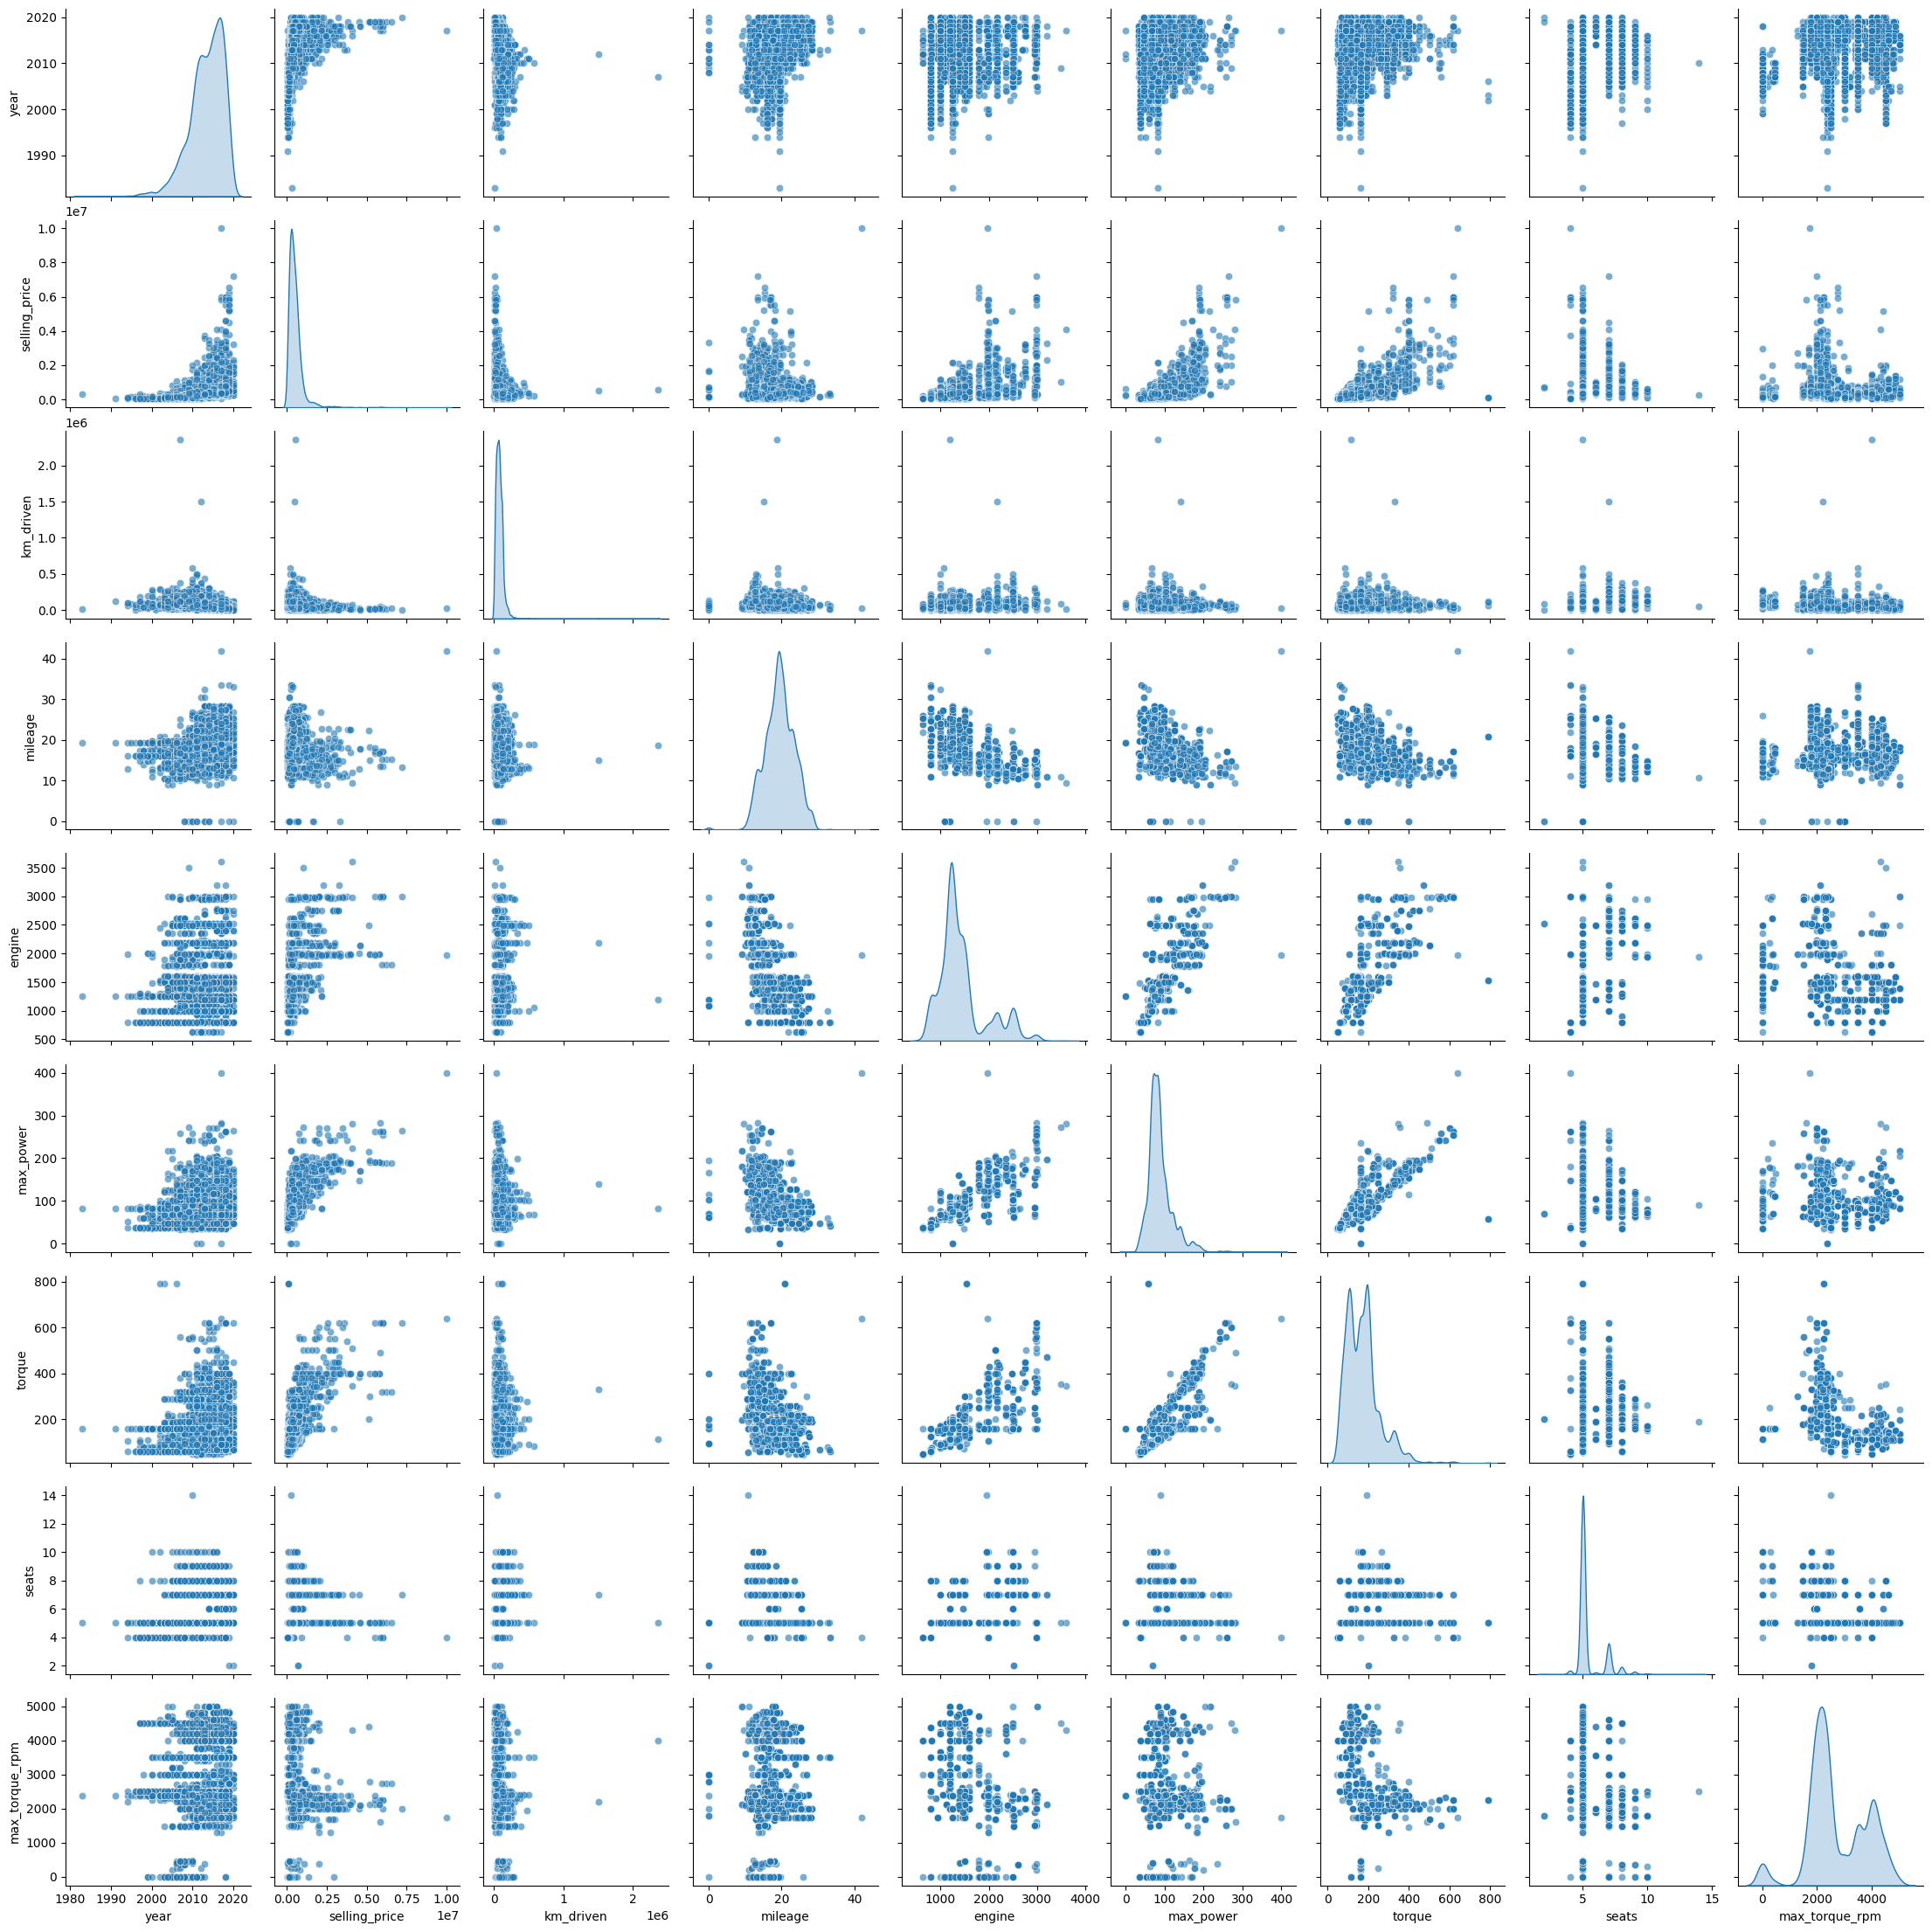

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

sns.pairplot(df_train[numeric_cols], 
             diag_kind='kde',
             plot_kws={'alpha': 0.6})

**Ответ:**
- Видно, что есть какие-то зачатки (возможно, надо чуть настроить масштаб осей и будет видно лучше) связи между таргетом (ценой) и:
    - мощностью  двигателя (и крутящим моментом) - чем мощнее (или тяговитее, в случае крутящего момента), тем дороже 
    - годом выпуска -чем новее машина, тем дороже
    - пробегом - чем меньше, тем дороже
- между мощностью (max_power) и крутящим моментом (torque) получилась хорошая линейная связь, значит преобразование у нас правильное, но один из признаков, возможно, стоит удалить. Так же видна корреляция между engine и max_power, что тоже логично.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

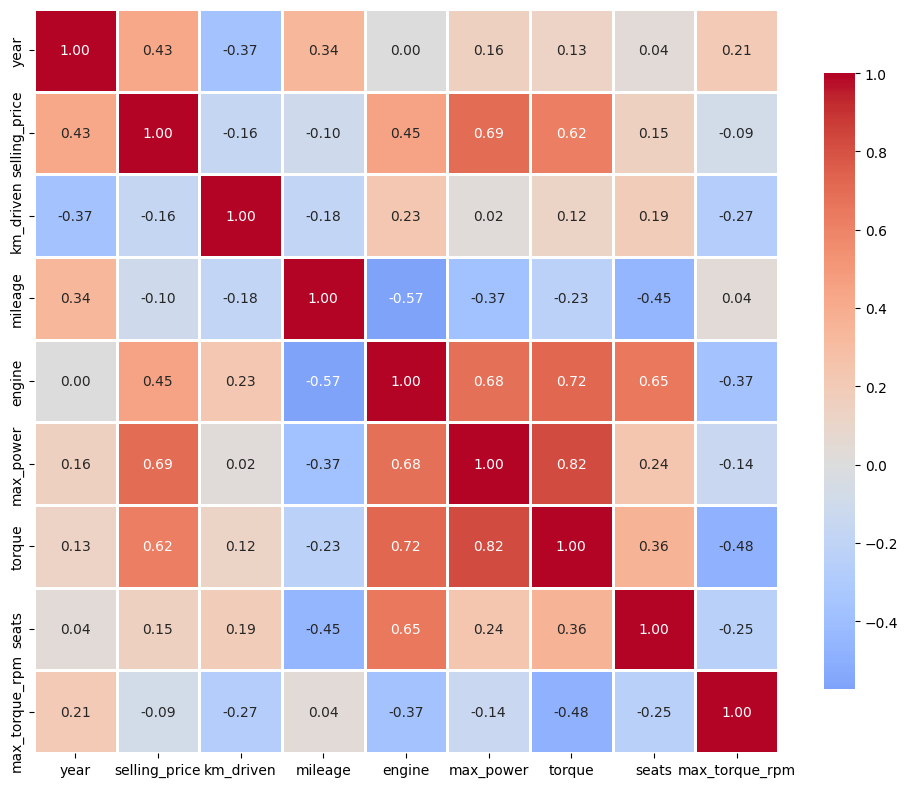

In [315]:
corr_matrix = df_train[numeric_cols].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

**Ответ:**
- Наименее скоррелированы year и engine, она вообще нулевая
- Между torque, engine и max_power. Ещё затесалась seats_max (опять видимо из-за того, что спортивные мощные с меньшим кол-вом сидений)
- в целом да, имеем отрицательную корреляцию, хоть и не очень сильную (мб просто нелинейная зависимость, а у нас пирсон хорошо ловит линейную)
- использовал Пирсона, как и просили, есть ещё Кендалла и Спирмена, они ранговые, ими можно ловить нелинейные связи лучше

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [316]:
def get_ranks(arr):
        sorted_indices = np.argsort(arr)
        sorted_arr = arr[sorted_indices]
        
        ranks = np.zeros_like(arr, dtype=float)
        
        i = 0
        while i < len(arr):
            j = i
            while j < len(arr) and sorted_arr[j] == sorted_arr[i]:
                j += 1
            avg_rank = (i + 1 + j) / 2.0
            
            for k in range(i, j):
                ranks[sorted_indices[k]] = avg_rank
            
            i = j
        
        return ranks


def from_scratch_spearman(x, y):
    """самопальная корреляция спирмена с циклами..."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    
    rank_x = get_ranks(x)
    rank_y = get_ranks(y)
  
    x_centered = rank_x - np.mean(rank_x)
    y_centered = rank_y - np.mean(rank_y)

    numerator = np.sum(x_centered * y_centered)
    denominator = np.sqrt(np.sum(x_centered**2) * np.sum(y_centered**2))
    
    return numerator / denominator if denominator != 0 else 0

<Axes: >

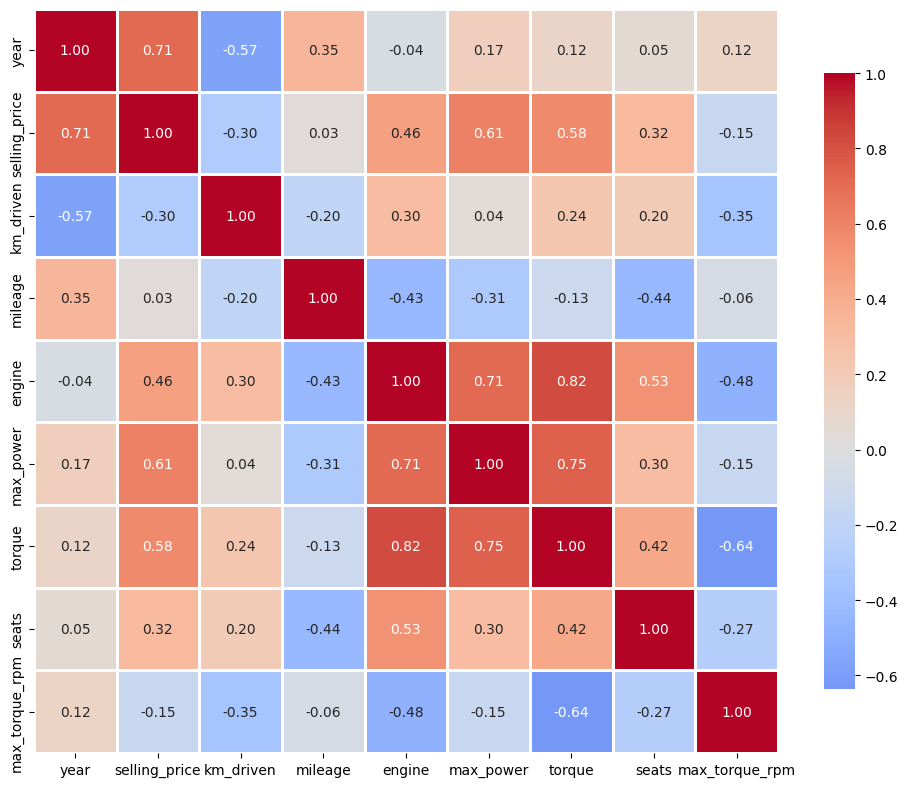

In [317]:
corr_matrix = df_train[numeric_cols].corr(method=from_scratch_spearman)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

In [318]:
# все сходится
np.allclose(df_train[numeric_cols].corr(method="spearman"), corr_matrix)

True

In [319]:
# !pip install phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


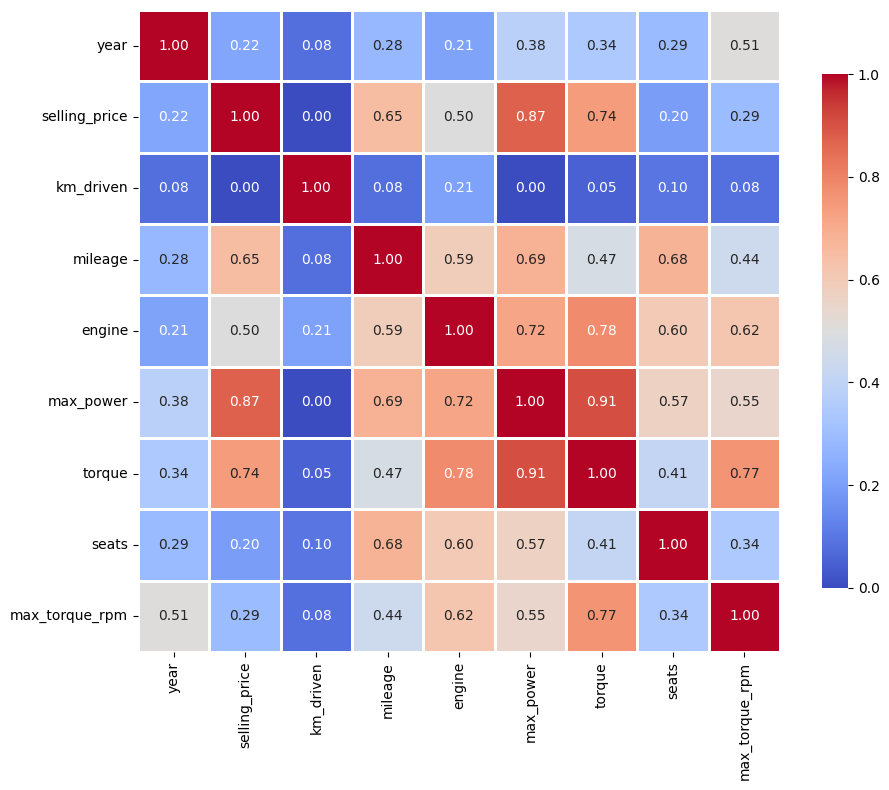

In [320]:
import phik
from phik.report import plot_correlation_matrix

phik_matrix = df_train[numeric_cols].phik_matrix()


# тут диапазон от 0 до 1
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=0,
            vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.tight_layout()
plt.show()

**Ответ:**
- Ручная реализация корреляции спирмена дала тот же результат, что и реализация в пандасе
- Ранговая корреляция между некоторыми признакми сильнее, чем пирсона (т.к. ловим не только линейную зависимость)
- Phi-k корреляция по идее может находить и немонотонные зависиомсти, на heatmap видно, что есть некоторые пары признаков, между которыми эта корреляция сильно выше, чем другие. Для более четких выводов необходимо подробнее анализировать фичи.
- Если говорить про интерпретацию, то, по корреляциям можем сделать вывод о том, что:
    - различные параметры, которые так или иначе отвечают за мощность двигателя, достаточно сильно скоррелированы
    - если смотреть по разным heatmap'ам, то можно увидеть, что все признаки так или иначе в какой-то мере коррелируют с таргетом
    - из того, что сразу приходит на ум и подтверждается данными:
        - выше год выпуска -> выше цена
        - выше объем двигателя/крутящий момент/максимальная мощность -> выше цена

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [321]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [322]:
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

# Создаем X_train только с вещественными признаками
X_train = df_train.drop(columns=categorical_cols + ['selling_price'], errors='ignore')
y_train = df_train['selling_price']

In [323]:
# опишите выбранные вещественные признаки

# 1. year - год выпуска
# 2. km_driven - пробег
# 3. mileage - расход топлива
# 4. engine - объем двигателя
# 5. max_power - максимальная мощность
# 6. seats - количество мест
# 7. torque_nm - крутящий момент
# 8. max_torque_rpm - обороты, при которых достигается максимальный крутящий момент

In [324]:
X_test = df_test.drop(columns=[*categorical_cols, target], errors='ignore')
y_test = df_test[target]

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [326]:
def calculate_metrics(y_true, y_pred, data_name):
    print("\n------------")
    print(f"Метрики на {data_name}:")
    print(f"R2: {r2_score(y_true, y_pred):.3f}")
    print(f"MSE: {MSE(y_true, y_pred):.3f}")
    print("------------")

def predict_and_evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    calculate_metrics(y_train, y_train_pred, "train")
    calculate_metrics(y_test, y_test_pred, "test")

In [327]:
predict_and_evaluate(lr_model, X_train, X_test, y_train, y_test)


------------
Метрики на train:
R2: 0.601
MSE: 114399737159.437
------------

------------
Метрики на test:
R2: 0.600
MSE: 229844303935.797
------------


**Ответ:**
- По MSE вывод делать сложно, т.к. это валюта цены в квадрате, плюс надо смотреть на масштаб данных
- $R^2$ на трейне и на тесте около 0.6, модель не переобучилась. Качество не очень хорошее, но предсказательная способность имеется, часть дисперсии цены смогли объяснить

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [328]:
def manual_r2_score(y_true, y_pred):
    """Реализация коэффициента детерминации"""
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    
    y_mean = np.mean(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_mean) ** 2)

    return 1 - (ss_res / ss_tot)

In [329]:
# совпало
np.isclose(manual_r2_score(lr_model.predict(X_train), y_train), r2_score(lr_model.predict(X_train), y_train))

np.True_

**Ответ:**

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
$$R^2 = \frac{SS_{tot} - SS_{res}}{SS_{tot}} = \frac{SS_{reg}}{SS_{tot}}$$

**1. $SS_{res}$ (Sum of Squares Residual) - Остаточная сумма квадратов**

$$SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Где:**
- $y_i$ - значения таргета для i-го наблюдения
- $\hat{y}_i$ - предикт i-го наблюдения


**2. $SS_{tot}$ (Total Sum of Squares) - Общая сумма квадратов**

$$SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

**Где:**
- $y_i$ - т значения таргета для i-го наблюдения
- $\bar{y}$ - среднее таргета

**3. SS_reg (Sum of Squares Regression) - Объясненная сумма квадратов**

$$SS_{reg} = SS_{tot} - SS_{res} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$


Итого, можем интепретировать как долю дисперсси таргета, которую мы смогли объяснить моделью.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [330]:
# your code here

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [331]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [332]:
predict_and_evaluate(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)


------------
Метрики на train:
R2: 0.601
MSE: 114399737159.437
------------

------------
Метрики на test:
R2: 0.600
MSE: 229844303935.797
------------


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [333]:
pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': lr_model.coef_,
    'Абс. коэффициент': np.abs(lr_model.coef_)
}).sort_values('Абс. коэффициент', ascending=False)


Признак    Коэффициент  Абс. коэффициент
4       max_power  260498.431794     260498.431794
0            year  161855.524790     161855.524790
5          torque   95147.912535      95147.912535
1       km_driven  -48078.834933      48078.834933
6           seats  -31601.691690      31601.691690
3          engine   19722.973169      19722.973169
7  max_torque_rpm   -8844.364116       8844.364116
2         mileage   -3165.485044       3165.485044

**Ответ:**
- Признак "max_power" (Максмальная мощность) наиболее информативен

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [334]:
from sklearn.linear_model import Lasso

lr_model = Lasso(random_state=42)
lr_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [335]:
predict_and_evaluate(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)


------------
Метрики на train:
R2: 0.601
MSE: 114399737172.381
------------

------------
Метрики на test:
R2: 0.600
MSE: 229844993291.411
------------


In [336]:
pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': lr_model.coef_,
    'Абс. коэффициент': np.abs(lr_model.coef_)
}).sort_values('Абс. коэффициент', ascending=False)


Признак    Коэффициент  Абс. коэффициент
4       max_power  260499.988606     260499.988606
0            year  161853.153275     161853.153275
5          torque   95147.615901      95147.615901
1       km_driven  -48077.919317      48077.919317
6           seats  -31597.815362      31597.815362
3          engine   19720.688637      19720.688637
7  max_torque_rpm   -8842.539028       8842.539028
2         mileage   -3162.622728       3162.622728

**Ответ:**
- Не занулила, видимо слишком слабый коэф. и нет откровенно мусорных признаков, чтобы занулились при таком $\alpha$

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [337]:
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {
    'alpha': np.logspace(1, 5, 5),
    'max_iter': [1000, 5000, 10000],
}

lasso_grid = GridSearchCV(
    estimator=Lasso(random_state=42),
    param_grid=lasso_param_grid,
    cv=10,
    scoring='r2',
    verbose=1,
    return_train_score=True
)

lasso_grid.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'max_iter': [1000, 5000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [338]:
predict_and_evaluate(lasso_grid, X_train_scaled, X_test_scaled, y_train, y_test)


------------
Метрики на train:
R2: 0.599
MSE: 114997748707.006
------------

------------
Метрики на test:
R2: 0.587
MSE: 237145349501.905
------------


In [339]:
lasso_grid.best_params_

{'alpha': np.float64(10000.0), 'max_iter': 1000}

In [340]:
lasso_grid.best_estimator_.coef_

pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': lasso_grid.best_estimator_.coef_,
    'Абс. коэффициент': np.abs(lasso_grid.best_estimator_.coef_)
}).sort_values('Абс. коэффициент', ascending=False)


Признак    Коэффициент  Абс. коэффициент
4       max_power  263191.734889     263191.734889
0            year  151030.774570     151030.774570
5          torque   93374.692982      93374.692982
1       km_driven  -39287.962272      39287.962272
6           seats   -6391.538088       6391.538088
2         mileage       0.000000          0.000000
3          engine       0.000000          0.000000
7  max_torque_rpm      -0.000000          0.000000

**Ответ:**
- 150 моделей (для каждого параметра все вариации и все это умножаем на кол-во фолдов т.к. учим на k-1, исключаяя каждый по очереди)
- alpha - коэф. регуляризации для лассо регресси, max_iter- кол-во итераций градиентного спуска
- коэф. 10000, да, занулились: mileage, engine, max_torque_rpm

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [341]:
from sklearn.linear_model import ElasticNet


elastic_param_grid = {
    'alpha': np.logspace(1, 5, 5),
    'l1_ratio': np.linspace(0.1, 0.9, 5),
    'max_iter': [1000, 5000, 10000],
}

elastic_grid = GridSearchCV(
    estimator=ElasticNet(random_state=42),
    param_grid=elastic_param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

elastic_grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'max_iter': [1000, 5000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [342]:
predict_and_evaluate(elastic_grid, X_train_scaled, X_test_scaled, y_train, y_test)


------------
Метрики на train:
R2: 0.523
MSE: 136667178252.073
------------

------------
Метрики на test:
R2: 0.462
MSE: 309390286275.038
------------


In [343]:
elastic_grid.best_params_

{'alpha': np.float64(10.0), 'l1_ratio': np.float64(0.9), 'max_iter': 1000}

**Ответ:**
- 750 моделей
- alpha: 10.0, l1_ratio: 0.9, max_iter: 1000

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [344]:
# не совсем понимаю как тут реализовать, по статье пытался дифф. вариант в пайторче накинуть, но как-то не очень идет)
import itertools

def l0_regularization_exhaustive(X, y, lambda_reg=0):
    """
    L0-регуляризация через полный перебор всех комбинаций признаков
    """
    n_features = X.shape[1]
    best_score = float('inf')
    best_model_info = None

    for k in range(1, n_features + 1):
        combinations = list(itertools.combinations(range(n_features), k))
        
        for feature_indices in combinations:
            X_subset =  X[:, list(feature_indices)]
            

            try:
                lr = LinearRegression()
                lr.fit(X_subset, y)
   
                y_pred = lr.predict(X_subset)
                mse = np.mean((y - y_pred) ** 2)
                
                score = mse + lambda_reg * k
                

                model_info = {
                    'k': k,
                    'feature_indices': list(feature_indices),
                    
                    'mse': mse,
                    'r2': r2_score(y, y_pred),
                    'score': score,
                    'coefficients': lr.coef_,
                    'intercept': lr.intercept_
                }
                
                if score < best_score:
                    best_score = score
                    best_model_info = model_info
                    
            except Exception as e:
                continue
    
    return best_model_info


In [345]:
best_model = l0_regularization_exhaustive(X_train_scaled, y_train, 1)
best_model

{'k': 8,
 'feature_indices': [0, 1, 2, 3, 4, 5, 6, 7],
 'mse': np.float64(114399737159.43674),
 'r2': 0.6008917096895767,
 'score': np.float64(114399737167.43674),
 'coefficients': array([161855.52478987, -48078.83493296,  -3165.48504441,  19722.97316896,
        260498.4317941 ,  95147.91253493, -31601.6916898 ,  -8844.36411639]),
 'intercept': np.float64(522960.09109588654)}

In [346]:
best_model = l0_regularization_exhaustive(X_train_scaled, y_train, 10**8)
best_model

{'k': 6,
 'feature_indices': [0, 1, 3, 4, 5, 6],
 'mse': np.float64(114440227774.8978),
 'r2': 0.6007504493972758,
 'score': np.float64(115040227774.8978),
 'coefficients': array([158940.39367314, -47758.40583233,  22941.24258601, 255196.5956452 ,
        102422.30010368, -31369.59806082]),
 'intercept': np.float64(522960.0910958866)}

In [347]:
best_model = l0_regularization_exhaustive(X_train_scaled, y_train, 10**10)
best_model

{'k': 2,
 'feature_indices': [0, 4],
 'mse': np.float64(119223937906.8015),
 'r2': 0.5840614392693602,
 'score': np.float64(139223937906.8015),
 'coefficients': array([174879.90885109, 343491.63852495]),
 'intercept': np.float64(522960.0910958862)}

**Ответ:**
- Вроде все получилось, веса в модели большие, поэтому при сильно большом коэф. регуляризации начинают отваливаться фичи, это видно выше
- На 2х признаках у нас получилось близкое к исходному (на всех признаках) качество: 0.58 по $R_2$

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [348]:
# самый простой и рабочий вариант - отрезать первое слово, которое является маркой авто
df_train["name"] = df_train["name"].apply(lambda x: x.split()[0])
df_test["name"] = df_test["name"].apply(lambda x: x.split()[0])

In [349]:
counts = df_train.name.value_counts()
# редкие категории заменим на Other для того, чтобы избежать совсем сильного раздувания пространства признаков при OHE
# ну и информации полезной мало дадут появившиеся признаки для редких марок авто, скорее только могут попортить стабильность модели
rare_names = set(counts[counts < 20].index)

df_train["name"] = df_train["name"].apply(lambda x: x if x not in rare_names else "Other")
df_test["name"] = df_test["name"].apply(lambda x: x if x not in rare_names else "Other")

In [350]:
# вроде дальше все-таки считаем seats категориальной (ну как минимум его кодируем через ohe)
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

X_train_cat = df_train[categorical_cols].copy()
X_train_cat["seats"] = X_train_cat["seats"].astype(str)
X_test_cat = df_test[categorical_cols].copy()
X_test_cat["seats"] = X_test_cat["seats"].astype(str)

In [351]:
# тут в идеале так же добавить небольшую предобработку, чтобы мелкие категории схлопнуть
X_train_cat["seats"].value_counts()

seats
5     4618
7      800
8      191
4       94
9       68
6       48
10      18
2        2
14       1
Name: count, dtype: int64

In [352]:
counts = X_train_cat.seats.value_counts()
rare_seats = set(counts[counts < 20].index)

X_train_cat["seats"] = X_train_cat["seats"].apply(lambda x: x if x not in rare_seats else "Other")
X_test_cat["seats"] = X_test_cat["seats"].apply(lambda x: x if x not in rare_seats else "Other")

In [353]:
# assert X_train_cat.shape == (5840, 11)

In [354]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner seats
count     5840    5840        5840         5840         5840  5840
unique      19       4           3            2            5     7
top     Maruti  Diesel  Individual       Manual  First Owner     5
freq      1804    3177        5223         5336         3603  4618

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [355]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train.drop(columns=["seats"]))
X_test_scaled_new = scaler.transform(X_test.drop(columns=["seats"]))

In [356]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# новые категории игнорим, один столбец (первый) удаляем, чтобы не плодить ЛЗ фичи
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

/home/max/HSE_AI/ml/hse-ml-hw-1/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

**Ответ:**
- нужно следить за тем, чтобы в признаке не было слишком много категорий, иначе сильно раздуваем признаковое пространство не получая особо профита, нужно удалять 1 столбец после преобразования признака, иначе получаем ЛЗ между столбцами (по идее можно забить и использовать регуляризацию, тогда все будет ок)
- чтобы не было ЛЗ между столбцами (нет аналитического решения, если градиентным методом, то сходимость будет плохая, накопится ошибка вычислений и т.п.)
- Можем, просто надо сделать это правильно. По идее можем просто такие категории в исходном признаке слить в какой-нибудь "other" и потом так уже применять OHE, тогда все будет ок на инференсе

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [357]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# скейлить OHE не нужно, добавим числовые фичи из предыдущих шагов
X_train_full = np.concatenate([X_train_scaled_new, X_train_cat.toarray()], axis=1)
X_test_full = np.concatenate([X_test_scaled_new, X_test_cat.toarray()], axis=1)


ridge_param_grid = {
    'alpha': np.logspace(1, 5, 10),
    'max_iter': np.arange(500, 5000, 500)
}

ridge_grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=ridge_param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

ridge_grid.fit(X_train_full, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05]),
                         'max_iter': array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])},
             return_train_score=True, scoring='r2', verbose=1)

In [358]:
predict_and_evaluate(ridge_grid, X_train_full, X_test_full, y_train, y_test)


------------
Метрики на train:
R2: 0.738
MSE: 75191403304.292
------------

------------
Метрики на test:
R2: 0.751
MSE: 143059489955.202
------------


**Ответ:**
- Переобучились, не удалось на тесте улучшить качество прогноза

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [359]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [360]:
def business_metric(y_true, y_pred):
    diff = np.abs(y_true - y_pred) 
    threshold = 0.10 * y_true
    is_accurate = diff <= threshold
    return is_accurate.mean() * 100

print("Доля верных прогнозов как прогнозов, с ошибкой <= 10%):")

# 1. Обычная регрессия (на численных данных со стандартизацией)
metric_simple = business_metric(y_test, lr_model.predict(X_test_scaled))
print(f"Linear Regression (Base): {metric_simple:.2f}%")

# 2. Lasso (после GridSearch)
metric_lasso = business_metric(y_test, lasso_grid.best_estimator_.predict(X_test_scaled))
print(f"Lasso Tuned: {metric_lasso:.2f}%")

# 3. ElasticNet
metric_elastic = business_metric(y_test, elastic_grid.best_estimator_.predict(X_test_scaled))
print(f"ElasticNet Tuned: {metric_elastic:.2f}%")

# 4. Ridge (с категориальными признаками OHE)
metric_ridge_ohe = business_metric(y_test, ridge_grid.best_estimator_.predict(X_test_full))
print(f"Ridge + OHE: {metric_ridge_ohe:.2f}%")


# по такой метрике лучше всего последняя модель, категориальные фичи дали небольшой аплифт

Доля верных прогнозов как прогнозов, с ошибкой <= 10%):
Linear Regression (Base): 24.80%
Lasso Tuned: 23.90%
ElasticNet Tuned: 24.70%
Ridge + OHE: 26.00%


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [361]:
import numpy as np

def asymmetric_mse(y_true, y_pred, underpred_weight=2):
    """
    Асимметричная MSE, где недопрогноз штрафуется сильнее (в underpred_weight раз)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    errors = y_pred - y_true
    under_pred_mask = errors < 0
    
    weights = np.ones_like(errors)
    weights[under_pred_mask] = underpred_weight
    weighted_squared_errors = weights * (errors ** 2)
    
    return np.mean(weighted_squared_errors)
    

print("Асимметричная MSE:")

# 1. Обычная регрессия (на численных данных со стандартизацией)
metric_simple = asymmetric_mse(y_test, lr_model.predict(X_test_scaled))
print(f"Linear Regression (Base): {metric_simple:.2f}%")

# 2. Lasso (после GridSearch)
metric_lasso = asymmetric_mse(y_test, lasso_grid.best_estimator_.predict(X_test_scaled))
print(f"Lasso Tuned: {metric_lasso:.2f}%")

# 3. ElasticNet
metric_elastic = asymmetric_mse(y_test, elastic_grid.best_estimator_.predict(X_test_scaled))
print(f"ElasticNet Tuned: {metric_elastic:.2f}%")

# 4. Ridge (с категориальными признаками OHE)
metric_ridge_ohe = asymmetric_mse(y_test, ridge_grid.best_estimator_.predict(X_test_full))
print(f"Ridge + OHE: {metric_ridge_ohe:.2f}%")


# по такой метрике лучше всего последняя модель, категориальные фичи дали аплифт, но взвешивать mse конечно не очень интепретируемо в абсолютных значениях, но сравнить модельки можно

Асимметричная MSE:
Linear Regression (Base): 433593147661.56%
Lasso Tuned: 449189304022.31%
ElasticNet Tuned: 600063533889.05%
Ridge + OHE: 264988894974.13%


In [362]:
import numpy as np

def asymmetric_mse(y_true, y_pred, underpred_weight=2):
    """
    Асимметричная MSE, где недопрогноз штрафуется сильнее (в underpred_weight раз)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    errors = y_pred - y_true
    under_pred_mask = errors < 0
    
    weights = np.ones_like(errors)
    weights[under_pred_mask] = underpred_weight
    weighted_squared_errors = weights * (errors ** 2)
    
    return np.mean(weighted_squared_errors)
    

print("Асимметричная MSE:")

# 1. Обычная регрессия (на численных данных со стандартизацией)
metric_simple = asymmetric_mse(y_test, lr_model.predict(X_test_scaled))
print(f"Linear Regression (Base): {metric_simple:.2f}%")

# 2. Lasso (после GridSearch)
metric_lasso = asymmetric_mse(y_test, lasso_grid.best_estimator_.predict(X_test_scaled))
print(f"Lasso Tuned: {metric_lasso:.2f}%")

# 3. ElasticNet
metric_elastic = asymmetric_mse(y_test, elastic_grid.best_estimator_.predict(X_test_scaled))
print(f"ElasticNet Tuned: {metric_elastic:.2f}%")

# 4. Ridge (с категориальными признаками OHE)
metric_ridge_ohe = asymmetric_mse(y_test, ridge_grid.best_estimator_.predict(X_test_full))
print(f"Ridge + OHE: {metric_ridge_ohe:.2f}%")


# по такой метрике лучше всего последняя модель, категориальные фичи дали аплифт, но взвешивать mse конечно не очень интепретируемо в абсолютных значениях, но сравнить модельки можно

Асимметричная MSE:
Linear Regression (Base): 433593147661.56%
Lasso Tuned: 449189304022.31%
ElasticNet Tuned: 600063533889.05%
Ridge + OHE: 264988894974.13%


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.


In [363]:
import pickle

numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

medians_to_save = {}
for col in numeric_features:
    if col in df_train.columns:
        medians_to_save[col] = float(df_train[col].median())

rare_categories = {
    'name': list(rare_names),
    'seats': list(rare_seats)
}

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'ohe': ohe,  

        'model': ridge_grid.best_estimator_,
        'numeric_features': numeric_features,
        'categorical_features': ['name', 'fuel', 'seller_type', 
                                'transmission', 'owner', 'seats'],

        'medians': medians_to_save,
        'rare_categories': rare_categories,
        'ohe_feature_names': ohe.get_feature_names_out(categorical_features).tolist()
    }, f)